# Praca domowa 2
## Biblioteki

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1")

Odczytujemy ramkę danych i widzimy, że mamy do czynienia z całkiem dużą ilością danych.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420020 entries, 0 to 420019
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lp                      420020 non-null  int64  
 1   date                    420020 non-null  object 
 2   item_id                 420020 non-null  int64  
 3   categories              420020 non-null  object 
 4   pay_option_on_delivery  420020 non-null  int64  
 5   pay_option_transfer     420020 non-null  int64  
 6   seller                  420020 non-null  object 
 7   price                   420020 non-null  float64
 8   it_is_allegro_standard  420020 non-null  int64  
 9   it_quantity             420020 non-null  int64  
 10  it_is_brand_zone        420020 non-null  int64  
 11  it_seller_rating        420020 non-null  int64  
 12  it_location             420020 non-null  object 
 13  main_category           420020 non-null  object 
dtypes: float64(1), int64

In [3]:
df.head()

,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


In [4]:
df.describe()

,lp,item_id,pay_option_on_delivery,pay_option_transfer,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating
count,420020.000000,4.200200e+05,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000,420020.000000
mean,210009.500000,5.809067e+09,0.877972,0.812495,76.811350,0.583456,6748.274823,0.016694,20402.593496
std,121249.474369,3.387402e+08,0.327318,0.390317,390.326271,0.492987,23387.248064,0.128124,36682.898636
min,0.000000,4.179879e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,105004.750000,5.652990e+09,1.000000,1.000000,9.000000,0.000000,6.000000,0.000000,1581.000000
50%,210009.500000,5.968052e+09,1.000000,1.000000,24.990000,1.000000,95.000000,0.000000,6711.000000
75%,315014.250000,6.070760e+09,1.000000,1.000000,68.450000,1.000000,931.000000,0.000000,21007.000000
max,420019.000000,6.099927e+09,1.000000,1.000000,119000.000000,1.000000,99999.000000,1.000000,292074.000000


## Zadanie 1
Używamy Target ecoding do zakodowania zmiennej it_location. Zobaczy co jest w kolumnie it_location.

In [5]:
df["it_location"].value_counts()

Warszawa                               23244
Kraków                                 15135
Łódź                                   10935
Poznań                                 10610
Wrocław                                 8646
                                       ...  
maków podhalanski                          1
Paris                                      1
tuplice                                    1
Piotrków Trybunalski Pabianice Łódź        1
MIECHÓW K. KRAKOWA                         1
Name: it_location, Length: 10056, dtype: int64

In [6]:
df["it_location"].value_counts()[df["it_location"].value_counts() == 1]

Jasien                                 1
Łazy-Ciągowice                         1
Mąkowarsko                             1
Bielsko-Biała / Cieszyn                1
Wysoka Lelowska                        1
                                      ..
maków podhalanski                      1
Paris                                  1
tuplice                                1
Piotrków Trybunalski Pabianice Łódź    1
MIECHÓW K. KRAKOWA                     1
Name: it_location, Length: 3133, dtype: int64

Widzimy, że unikalnych wartości jest aż 10056, samych nazw które wystąpiły 1 raz jest 3133 i są to w większości źle wpisane nazwy

In [7]:
import category_encoders
from category_encoders import TargetEncoder

target_encoder = TargetEncoder()
encoded = target_encoder.fit(df["it_location"], df["price"])

In [8]:
encoded.transform(df["it_location"])

,it_location
0,85.423398
1,85.423398
2,61.990914
3,35.433365
4,117.191956
...,...
420015,24.306929
420016,66.785334
420017,18.682800
420018,106.203076


#### Przewaga Target nad OneHot 
W tym przypadku największą przewagą Target Encoding jest dużo mniejszy rozmiar macierzy wynikowej. Gdybyśmy użyli OneHot Encoding dostalibyśmy macierz o rozmiarach 420020x10056, bo tyle było unikalnych wartości. Jest to macierz całkiem imponujących rozmiarów, z którą niewątpliwe trudno by się pracowało. To co jeszcze działa na korzyść TargetEncoding o to, że naszym targetem jest kolumna price, czyli kolumna o wartościach ciągłych. Zmniejsza to szansę na to że dwie oddzielne kategorie dostaną ten sam wynik po TargetEncoding.

### Encoding dla kolumny main_category
#### OneHot Encoder

In [9]:
from category_encoders import OneHotEncoder

ce_one_hot = OneHotEncoder(cols = "main_category")
ce_one_hot.fit_transform(df.main_category).head()

,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5,main_category_6,main_category_7,main_category_8,main_category_9,main_category_10,...,main_category_18,main_category_19,main_category_20,main_category_21,main_category_22,main_category_23,main_category_24,main_category_25,main_category_26,main_category_27
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


W przypadku kodowania kolumny main catagory OneHot sprawdza się już duzo lepiej. Utworzona w ten sposób macierz ma już tylko 27 kolumn, więc można juz z nią pracować.

#### BaseN Encoder

In [10]:
from category_encoders import BaseNEncoder
ce = BaseNEncoder(cols = ['main_category'], base = 2)
ce.fit_transform(df.main_category, df["price"]).head()

,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,0,0,0,1,1
3,0,0,0,1,0,0
4,0,0,0,0,1,0


BaseN działa całkiem podobnie jak OneHot, ale w zależności od parametru base koduje dane w różnych systemach. Domyślnie jest to kodowanie binarne, dzięki temu możemy ograniczyć kolumny w macierzy wynikowej do 5 kolumn. Wydaje mi się, że wadą tej metody może byc to, że w odróżnieniu do OneHot, długości wektorów w BaseN nie zawsze są równe jeden, co może wpłynąć niekorzystnie na wyniki w niektórych algorytmach uczenia.

#### Ordinal Encoder

In [11]:
from category_encoders import OrdinalEncoder
ce = OrdinalEncoder(cols = ['main_category'])
ce.fit_transform(df.main_category, df["price"]).head(10)

,main_category
0,1
1,2
2,3
3,4
4,2
5,2
6,2
7,5
8,6
9,6


Jest to przypisanie liczb do kategorii. Otrzymujemy tylko jedną kolumne w macierzy wynikowej, ale za  to categorie są teraz porównywalne, co może okazać się wadą.

## Zadanie 2 

In [12]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

rms = [0] * 10
mean_result = [0] * 10
lenght = 5000

data = df[["price", "it_seller_rating", "it_quantity"]].head(lenght)
imputer = KNNImputer(n_neighbors=5, weights="uniform")

for i in range(10):
    
    # ramka danych z usuniętymi danymi 
    data_nan = data.copy(deep = True)
    data_nan.loc[data.sample(frac = 0.1).index,'it_seller_rating'] = np.NaN
    
    # Ramka z uzupełnionymi danymi 
    result = pd.DataFrame(imputer.fit_transform(data_nan))
    result.columns = data.columns
    
    # Obliczanie rmse
    rms[i] = mean_squared_error(data.it_seller_rating, result.it_seller_rating, squared=False)
    
    # Ramka danych potrzebna do wykresu
    mean_result[i] = result.it_seller_rating
    
mean_result = pd.DataFrame(np.array(mean_result).transpose()).mean(axis = 1)
print("Średni błąd w danych przy brakach w jednaj kolumnie: ") 
sum(rms)/len(rms)



Średni błąd w danych przy brakach w jednaj kolumnie: 


10481.71073879838

Biorąc pod uwagę, że mamy tylko 500 wyników uzupełnionych automatycznie to wynik ten nie jest pardzo zadowalający. Należy jednak też zauważyć, że wartości w szacowanej kolumnie są rządu tysięcy i dziesięciu tysięcy, więc być może procentowo to odchylenie nie jest aż tak duże

In [13]:
mean_result2 = [0] * 10

for i in range(10):
    # Ramka z brakami 
    data_nan = data.copy(deep = True)
    data_nan.loc[data.sample(frac = 0.1).index,'it_seller_rating'] = np.NaN
    data_nan.loc[data.sample(frac = 0.1).index,'it_quantity'] = np.NaN
    
    # Ramka uzupełniona 
    result = pd.DataFrame(imputer.fit_transform(data_nan))
    result.columns = data.columns
    
    # Liczenie rmse oraz tworzenie ramki do wykresu 
    rms[i] = mean_squared_error(data.it_seller_rating, result.it_seller_rating, squared=False)
    mean_result2[i] = result.it_seller_rating
mean_result2 = pd.DataFrame(np.array(mean_result2).transpose()).mean(axis = 1)
print("Średni błąd w danych przy brakach w dwóch kolumnach: ") 
sum(rms)/len(rms)

Średni błąd w danych przy brakach w dwóch kolumnach: 


10156.621475534295

Gdy braki występują w dwóch kolumnach to nie wpływa to znacząco na wynik w kolumnie it_seller_rating

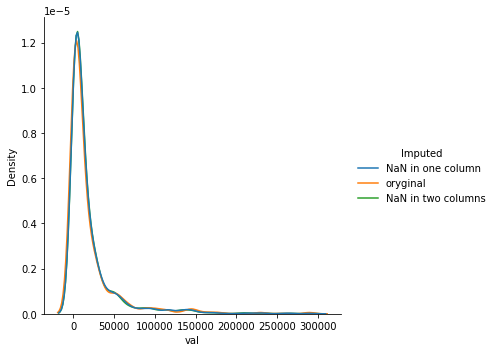

In [14]:
# DAne do wykresu 
data_plot1 = pd.DataFrame({"val": mean_result, "Imputed": "NaN in one column"})
data_plot3 = pd.DataFrame({"val": mean_result2, "Imputed": "NaN in two columns"})
data_plot2 = pd.DataFrame({"val": data.it_seller_rating, "Imputed" : "oryginal"})
data_plot = data_plot1.append(data_plot2).append(data_plot3)  
sns.displot(data = data_plot, x = "val", hue = "Imputed", kind="kde")

Powyższy wykres przedstawia rozkład danych oryyginalnych i dwóch uzupełnionych. Wydaje sie, że rozkład jest podobny do oryginalnego. Zobaczmy jednak jak to będzie wyglądać po zlogarytmowaniu danych 

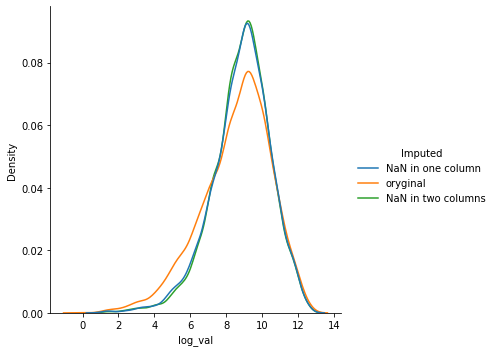

In [15]:
data_plot1 = pd.DataFrame({"log_val": np.log1p(mean_result), "Imputed": "NaN in one column"})
data_plot3 = pd.DataFrame({"log_val": np.log1p(mean_result2), "Imputed": "NaN in two columns"})
data_plot2 = pd.DataFrame({"log_val": np.log1p(data.it_seller_rating), "Imputed" : "oryginal"})
data_plot = data_plot1.append(data_plot2).append(data_plot3)  
sns.displot(data = data_plot, x = "log_val", hue = "Imputed", kind="kde")

Wykres zyskał bardziej normalny kształt. Widać na nim, że po uzuoełnieniu automatycznym danych zmniejsza się odchylenie danych. Są one bardziej skumulowane w jednym miejscu. 